### 세그먼트 트리
- 구간을 보존하고 있는 트리이다.
- 부모 노드는 자식들의 구간의 합을 가지고 있고, 모든 구간이 연속적이여야 한다.
- 루트는 전체 구간을 포함해야 한다.
- 따라서 보통 완전 이진트리를 통해 구현한다.
  - 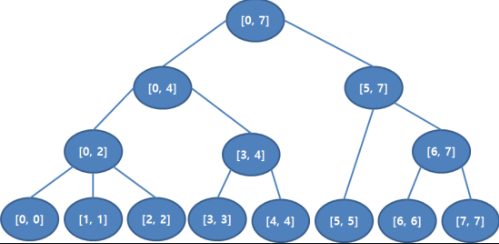
  - 값의 개수가 $2^n$의 꼴이 아닌경우, 의미없는 값이나 기본 값으로 채워서 포화 이진트리를 형성하는게 보통이다.
    - 그러려면 최소의 값을 찾아서 크기를 재조정하는 전처리 과정이 필요하다.
  - 이를 통해 값이 N개일 때 트리의 높이가 $logN$가 되도록 만들 수 있게된다.
  - 전반적으로 힙을 저장하는 구조와 비슷하게, 왼쪽/오른쪽의 순서로 노드 번호를 매겨서 접근하기 쉽게 한다.
- 세그먼트 트리의 구성에는 $O(N)$의 시간이 걸리며, update에는 $O(logN)$의 시간이 걸린다.

### 구현
- 재귀에 비해 2.5배쯤 빠른 비재귀로 구현한 버전 비재귀 코드는 2042 & 11505(구간 합&곱 구하기) 참고
- 가끔 IndexError가 날 경우 입력으로 들어갈 list의 사이즈를 1 더 늘려주면 해결된다. 
  - https://github.com/cheran-senthil/PyRival/issues/82
  - 대충 사이즈가 power of 2로 주워졌을 때, `query(len, len)`이나 `query(len, len, value)`를 호출하면 생긴다는 내용.

In [ ]:
class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, i):
    self[i] = self._def

  def __getitem__(self, i):
    return self.L[i + self._size]

  def __setitem__(self, i, v):
    i += self._size
    self.L[i] = v
    i >>= 1
    while i:
      self.L[i] = self._f(self.L[2 * i], self.L[2 * i + 1])
      i >>= 1

  def __len__(self):
    return self._len

  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)